# 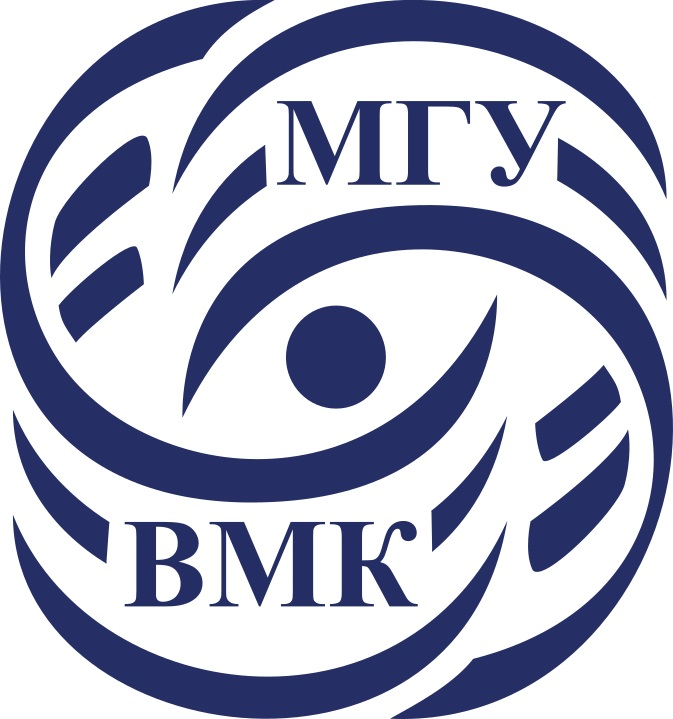

# Машинное обучение. ВМК МГУ

# Практическое задание 2. Knn: классификация и регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 684kB/s]


Проверим версию библиотеки:

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.7')


<font color='OrangeRed'>**Внимание!**</font> Перед выполнение данного задания рекомендуем сначала погрузиться в [Base] ноутбук по основам sklearn, нормализации и кросс-валидации, так как данные техники и понятия будут активно использоваться в данном ноутбук

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 1. Нормализация признакового пространства

В данном части задания исследуем, как нормализация (скейлинг) данных влияет на разделимость данных

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [ ]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 10.7MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [ ]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [ ]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

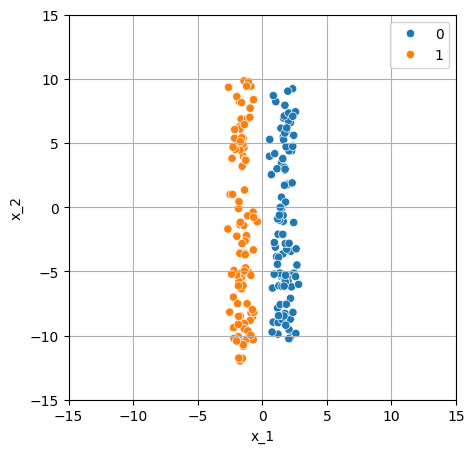

In [ ]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

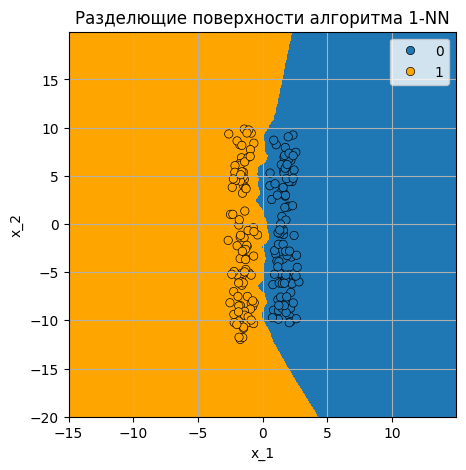

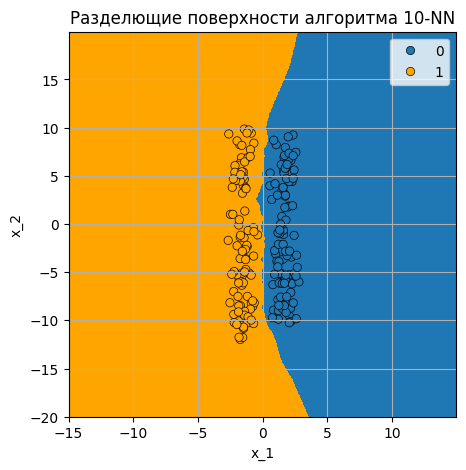

In [ ]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

## <font color='DarkOrange'>**Задание 1.1 (кросс-проверка, 1,5 балла)**</font>

 Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте <font color='OrangeRed'>**строгое математическое обоснование**</font> наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией (скейлингом) признаков.

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

В Евклидовом пространстве расстояние между двумя точками $A(x_{1_A}, x_{2_A})$ и $B(x_{1_B}, x_{2_B})$ вычисляется по формуле:

$$
\rho(A, B) = \sqrt{ (x_{1_A} - x_{1_B})^2 + (x_{2_A} - x_{2_B})^2}
$$

Отклонение разделяющей поверхности от прямой $x_1 = 0$ при $x_2 < -10$ и $x_2 > 10$ происходит из-за разного масштаба признаков. $x_2$ принимает значения, которые значительно превышают $x_1$, поэтому вклад признака $x_2$ в расстояние будет намного больше, чем вклад признака $x_1$, так как $(x_{2_A} - x_{2_B})^2 >> (x_{1_A} - x_{1_B})^2 $. Если масштаб $x_2$ больше в N раз масштаба $x_1$, то $x_2$ будет иметь в $N^2$ раз больший вес.

---

## <font color='DarkOrange'>**Задание 1.2 (кросс-проверка, 2 балла)**</font>


 Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется <font color='OrangeRed'>**математически строго, однозначно и с полным обоснованием**</font> определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

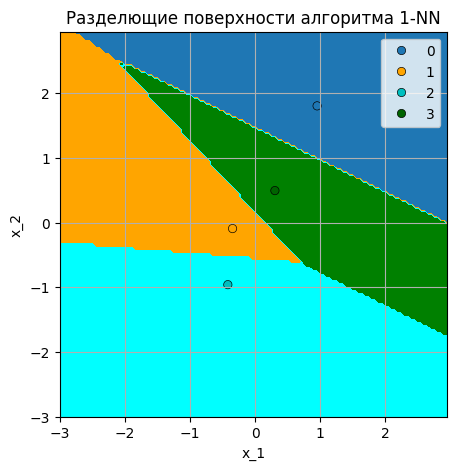

In [ ]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Разделяющими поверхностями являются пересечения серединных перпендикуляров между каждой парой точек.

**Метод математической индукции:**

**1. База индукции, n = 2**

Рассмотрим пару точек A, B, которые представляют собой отдельные классы.
- Разделяющая поверхность между A и B - геометрическое место точек, на котором расстояния до обеих точек равны.
- Если X находится на серединном перпендикуляре, то расстояния до А и В равны (как стороны равнобедренного треугольника).
Следовательно серединный перпендикуляр является разделяющей поверхностью для пары точек.

**2. Пусть предположение верно при n = k**

Для n = k разделяющими поверхностями будут являться пересечения серединных перпендикуляров между каждой парой точек.

**3. Шаг индукции**

Докажем, что предположение верно для n = k + 1

Рассмотрим k + 1 точку: $A_1, A_2,...,A_k, A_{k+1}$

По предположению, мы знаем, что для точек $A_1, A_2,...,A_k$ разделяющими поверхностями являются серединные перпендикуляры между каждой парой.
При добавлении точки $A_{k+1}$ нужно узнать ее влияние на разделяющие поверхности.

Для каждой из $A_1, A_2,...,A_k$ строим серединный перпендикуляр к отрезку $A_iA_{k+1}$, это создаст новые разделяющие поверхности.

Если мы возьмем произвольную точку
А, то она будет классифицирована по правилам 1-NN:
- Если А находится ближе к $A_{k+1}$, то она будет отнесена к классу $A_{k+1}$.
- Если А находится ближе к какой-то из $A_{i}, i = 1..k$, то она будет отнесена к классу $A_{i}$.

=> Утверждение доказано: Разделяющими поверхностями являются пересечения серединных перпендикуляров между каждой парой точек.

**Уравнение серединного перпендикуляра:**

Середина отрезка $A_1A_2$ вычисляется как: $M = (\frac{x_1 + x_2}{2},\frac{y_1 + y_2}{2})$

Угловой коэффициент отрезка $ A_1A_2$:

$
m = \frac{y_2 - y_1}{x_2 - x_1}
$

Тогда наклон серединного перпендикуляра $m_h$ будет равен:

$
m_h = -\frac{1}{m} = -\frac{x_2 - x_1}{y_2 - y_1}
$

Уравнение прямой, которая содержит серединный перпендикуляр:

$
y - \frac{y_1 + y_2}{2} = m_h ( x - \frac{x_1 + x_2}{2} )
$



          









---



# Часть 2. Кросс-валидация

Чтобы закрепить понимание устройства кросс-валидации предлагаем вам запрограммировать данный метод самостоятельно

## <font color='DarkOrange'>**Задание 2.1 (unit-tests, 3 балла)**</font>

 В модуле `cross_val.py` реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике.

- В качестве метрики качества будем использовать $accuracy\_score$.

<font color='CornflowerBlue'>**Accuracy**</font> - это доля верно классифицированных объектов, среди всех объектов выборки.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [ ]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
X_train = np.array(X_train, dtype=object)

In [ ]:
X_test = np.array(X_test, dtype=object)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* <font color='plum'>**Токенизация.**</font> Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* <font color='plum'>**Нормализация.**</font> Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* <font color='plum'>**Векторизация.**</font> Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации.

* Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа.

*  Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ предлагаем изучить самостоятельно, например, [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

<font color='MediumTurquoise'>**Полезные ссылки**</font>

Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В `sklearn` все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [ ]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

## <font color='DarkOrange'>**Задание 3.1 (кросс-проверка, 0,5 баллa)**</font>

 Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке.

 - Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [ ]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [ ]:
from cross_val import kfold_split, knn_cv_score
from sklearn.neighbors import KNeighborsClassifier
folds = kfold_split(len(X_train), 3)
result = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, KNeighborsClassifier)

{('CountVectorizer', 1, 'cosine', 'uniform'): 0.672087658236065, ('TfidfVectorizer', 1, 'cosine', 'uniform'): 0.6936529067480152, ('CountVectorizer', 1, 'cosine', 'distance'): 0.672087658236065, ('TfidfVectorizer', 1, 'cosine', 'distance'): 0.6936529067480152, ('CountVectorizer', 2, 'cosine', 'uniform'): 0.6110139528291619, ('TfidfVectorizer', 2, 'cosine', 'uniform'): 0.6346121200480795, ('CountVectorizer', 2, 'cosine', 'distance'): 0.6722644460023516, ('TfidfVectorizer', 2, 'cosine', 'distance'): 0.6936529067480152, ('CountVectorizer', 3, 'cosine', 'uniform'): 0.6175544674577872, ('TfidfVectorizer', 3, 'cosine', 'uniform'): 0.6405339477973659, ('CountVectorizer', 3, 'cosine', 'distance'): 0.6675804372619494, ('TfidfVectorizer', 3, 'cosine', 'distance'): 0.6917972913602056, ('CountVectorizer', 4, 'cosine', 'uniform'): 0.6152563671013902, ('TfidfVectorizer', 4, 'cosine', 'uniform'): 0.6429204420369062, ('CountVectorizer', 4, 'cosine', 'distance'): 0.6666081982842588, ('TfidfVectorizer',

In [ ]:
for key, value in result.items():
    print(f"{key}: {value}")

('CountVectorizer', 1, 'cosine', 'uniform'): 0.672087658236065
('TfidfVectorizer', 1, 'cosine', 'uniform'): 0.6936529067480152
('CountVectorizer', 1, 'cosine', 'distance'): 0.672087658236065
('TfidfVectorizer', 1, 'cosine', 'distance'): 0.6936529067480152
('CountVectorizer', 2, 'cosine', 'uniform'): 0.6110139528291619
('TfidfVectorizer', 2, 'cosine', 'uniform'): 0.6346121200480795
('CountVectorizer', 2, 'cosine', 'distance'): 0.6722644460023516
('TfidfVectorizer', 2, 'cosine', 'distance'): 0.6936529067480152
('CountVectorizer', 3, 'cosine', 'uniform'): 0.6175544674577872
('TfidfVectorizer', 3, 'cosine', 'uniform'): 0.6405339477973659
('CountVectorizer', 3, 'cosine', 'distance'): 0.6675804372619494
('TfidfVectorizer', 3, 'cosine', 'distance'): 0.6917972913602056
('CountVectorizer', 4, 'cosine', 'uniform'): 0.6152563671013902
('TfidfVectorizer', 4, 'cosine', 'uniform'): 0.6429204420369062
('CountVectorizer', 4, 'cosine', 'distance'): 0.6666081982842588
('TfidfVectorizer', 4, 'cosine', 'd

## <font color='DarkOrange'>**Задание 3.2 (кросс-проверка, 0,5 балл)**</font>

 Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [ ]:
Count = np.array([value for key, value in result.items() if key[0] == 'CountVectorizer'])
Tfidf = np.array([value for key, value in result.items() if key[0] == 'TfidfVectorizer'])

print(Count.mean(), Tfidf.mean())

0.6387355353440083 0.6626436330298413


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

TfidfVectorizer в среднем дает результат равный: **0.6626436330298413**

CountVectorizer в среднем дает результат равный: **0.6387355353440083**

TfidfVectorizer дает наилучший результат, так как он учитывает, что если слово встречается во многих документах, то оно менее полезно для определения класса текста. CountVectorizer это не учитывает.


## <font color='DarkOrange'>**Задание 3.3 (кросс-проверка, 1 балл)**</font>

 Начертите график (line plot) зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параметрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


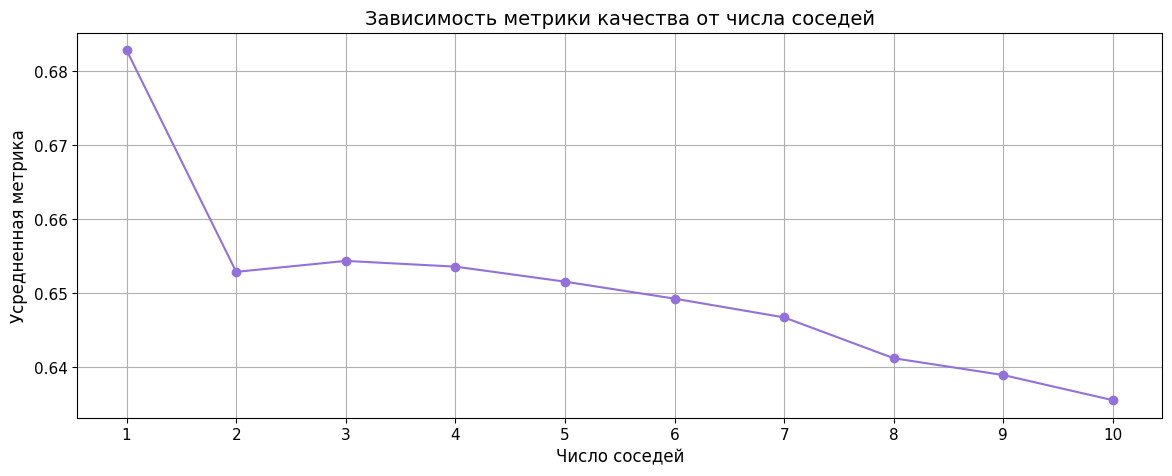

In [ ]:
import matplotlib.pyplot as plt
print(fetch_20newsgroups().target_names)
scores_mean = []
neighbors_count = []
score = []
last = 1
for key, value in result.items():
    if key[1] != last:
      scores_mean.append(np.mean(score))
      neighbors_count.append(last)
      score = []
      last = key[1]
    score.append(value)
scores_mean.append(np.mean(score))
neighbors_count.append(last)

plt.figure(figsize=(14, 5))
plt.grid(True)
plt.title("Зависимость метрики качества от числа соседей",fontsize=14)
plt.xlabel("Число соседей", fontsize=12)
plt.ylabel("Усредненная метрика", fontsize=12)
plt.xticks(range(0,11), fontsize=11)
plt.yticks(fontsize=11)
plt.plot(neighbors_count, scores_mean, marker='o', color='mediumpurple')
plt.show()

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

При возрастании числа соседей метрика в
среднем падает.

В названиях классов присутствуют похожие темы, в которых могут совпадать слова. Например, спортивные классы: 'rec.sport.baseball', 'rec.sport.hockey' или классы средств передвижения: 'rec.autos', 'rec.motorcycles'.

Качество модели может снижаться увеличением числа соседей, так как может добавляться шум из близких тем к целевой переменной.

## <font color='DarkOrange'>**Задание 3.4 (кросс-проверка, 1,5 баллa)**</font>

 Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [ ]:
max_value = max(result.values())
max_key = [key for key, value in result.items() if value == max_value][0]
print(f"Максимальное значение accuracy: {max_value}")
print(f"Key:  {max_key} ")

Максимальное значение accuracy: 0.6936529067480152
Key:  ('TfidfVectorizer', 1, 'cosine', 'uniform') 


In [ ]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)
X_train = np.array(X_train, dtype=object)
X_test = np.array(X_test, dtype=object)
y_train = np.array(y_train)
y_test = np.array(y_test)

tfid = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tfid.fit(X_train)
X_train_tfid = tfid.transform(X_train)
X_test_tfid = tfid.transform(X_test)

best_model = KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='uniform')
best_model.fit(X_train_tfid, y_train)

y_pred = best_model.predict(X_test_tfid)
score = accuracy_score(y_test, y_pred)
print(f"accuracy на лучших параметрах = {score}")

accuracy на лучших параметрах = 0.5315985130111525


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

1. Точность лучшей модели на тестовой части датасета = **0.5315985130111525**, а на кросс валидации получено **0.6936529067480152**

2. Распределения схожи: форма графиков практически одинакова, пики и спады находятся на схожих местах.

3. Средние значения и дисперсии обучающей и тестовой выборки равны с точностью 0.001

4. В тестовой выборке есть токены, которых нет в обучающей

Хотя распределения выборок очень похожи, модель показала себя хуже на тестовой выборке, так как в тестовой выборке есть токены, которых нет в обучающей.
На кросс-валидации модель демонстрировала лучшие результаты, поскольку тестирование происходило на частях обучающей выборки, которые она уже изучила.


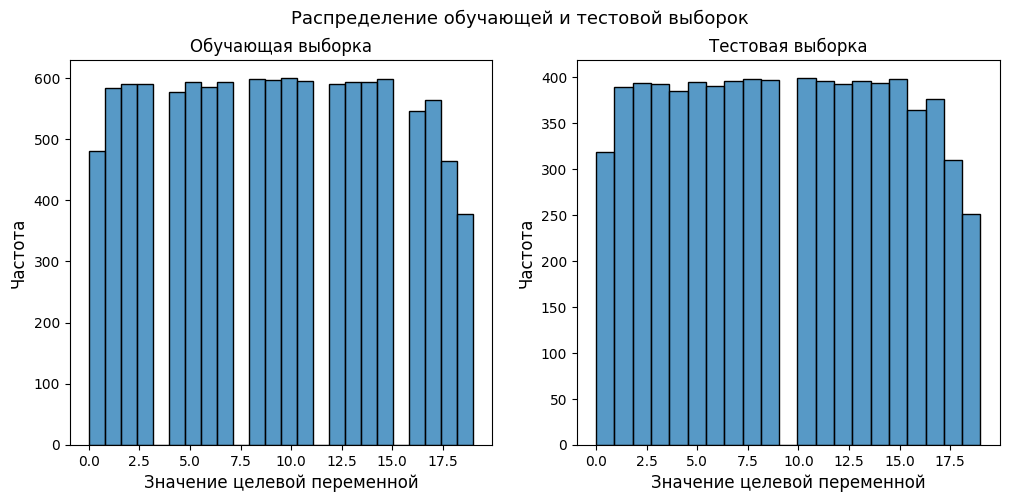

In [ ]:
def plot_distributions(train_labels, test_labels):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(train_labels, kde=False)
    plt.title('Обучающая выборка')
    plt.xlabel("Значение целевой переменной", fontsize=12)
    plt.ylabel("Частота", fontsize=12)

    plt.subplot(1, 2, 2)
    sns.histplot(test_labels, kde=False)
    plt.title('Тестовая выборка')
    plt.xlabel("Значение целевой переменной", fontsize=12)
    plt.ylabel("Частота", fontsize=12)

    plt.suptitle('Распределение обучающей и тестовой выборок', fontsize=13)

    plt.show()

# Передаем целевые переменные обучающей и тестовой выборок
plot_distributions(y_train, y_test)

In [ ]:
mean_train = np.mean(y_train)
var_train = np.var(y_train)

mean_test = np.mean(y_test)
var_test = np.var(y_test)

print(f"Среднее значение обучающей выборки: {mean_train}, тестовой выборки: {mean_test}")
print(f"Дисперсия обучающей выборки: {var_train}, тестовой выборки: {var_test}")

Среднее значение обучающей выборки: 9.29299982322786, тестовой выборки: 9.293414763674987
Дисперсия обучающей выборки: 30.941108855046814, тестовой выборки: 30.94603735691427


# <font color='MediumSeaGreen'>**Бонус [0,5 балла]**</font>

 Вставьте мем, описывающий ваше состоянии после решения данного ноутбука

Ваша картинка тут

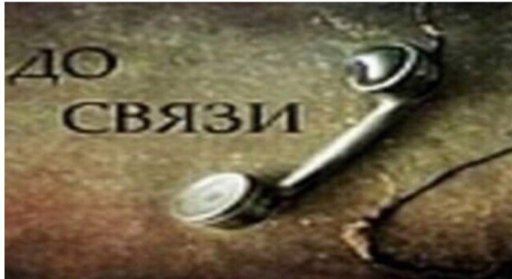